In [1]:
#import main processing libraries
import pandas as pd
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

#import stats for statistical analysis
import scipy.stats as stats

#import my own functions for data acquisition and preparation
from acquire import get_telco_data
from prep import prep_telco
from env import get_db_url

# import warnings filter to ignore pesky warnings
import warnings
warnings.filterwarnings('ignore')


Reading from CSV file...


### Initial acquisition and exploration

In [18]:
telco_df = get_telco_data()

telco_df.info()
telco_df.head()

Reading from CSV file...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7043 non-null   object 
 1   gender                      7043 non-null   object 
 2   senior_citizen              7043 non-null   int64  
 3   partner                     7043 non-null   object 
 4   dependents                  7043 non-null   object 
 5   tenure                      7043 non-null   int64  
 6   phone_service               7043 non-null   object 
 7   multiple_lines              7043 non-null   object 
 8   internet_service_type_id    7043 non-null   int64  
 9   online_security             7043 non-null   object 
 10  online_backup               7043 non-null   object 
 11  device_protection           7043 non-null   object 
 12  tech_support                7043 non-null   object 
 13  streamin

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,payment_type_id.1,payment_type,internet_service_type_id.1,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,Yes,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No,2,One year,2,Mailed check,1,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,No,No,No,No,Yes,1,No,2,59.9,542.4,No,1,Month-to-month,2,Mailed check,1,DSL
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,No,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,Yes,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,No,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes,1,Month-to-month,2,Mailed check,2,Fiber optic


In [ ]:

pd.set_option('display.max_columns', None) #View all columns when calling portions of df
pd.set_option('display.max_rows', 250) #View all rows selected (up to user-determined limit) when calling portions of df


In [11]:
telco_df.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,contract_type_id.1,payment_type_id.1,internet_service_type_id.1
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692,1.690473,2.315633,1.872923
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047,0.833755,1.148907,0.737796
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000,1.000000,1.000000,1.000000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000,1.000000,1.000000,1.000000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,1.000000,2.000000,2.000000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000,2.000000,3.000000,2.000000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,3.000000,4.000000,3.000000


In [12]:
telco_df_clean, telco_train, telco_validate, telco_test = prep_telco(telco_df)
telco_df_clean.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,1.872582,1.688567,2.315557,64.798208,2283.300441,0.504693,0.482509,0.298493,0.903299,0.096701,0.421928,0.216155,0.286547,0.216155,0.344852,0.216155,0.343857,0.216155,0.290102,0.216155,0.384386,0.216155,0.388367,0.592719,0.265785,0.209329,0.239619,0.216297,0.336320,0.228100,0.440273,0.216155
std,0.368844,24.545260,0.737271,0.832934,1.149523,30.085974,2266.771362,0.500014,0.499729,0.457629,0.295571,0.295571,0.493902,0.411650,0.452180,0.411650,0.475354,0.411650,0.475028,0.411650,0.453842,0.411650,0.486484,0.411650,0.487414,0.491363,0.441782,0.406858,0.426881,0.411748,0.472483,0.419637,0.496455,0.411650
min,0.000000,1.000000,1.000000,1.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.587500,401.450000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,1397.475000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Calculate baseline accuracy for later reference
print(f'Baseline accuracy for churn: {(telco_df_clean.churn_Yes == 0).mean()}')

Baseline accuracy for churn: 0.7342150170648464


<AxesSubplot:>

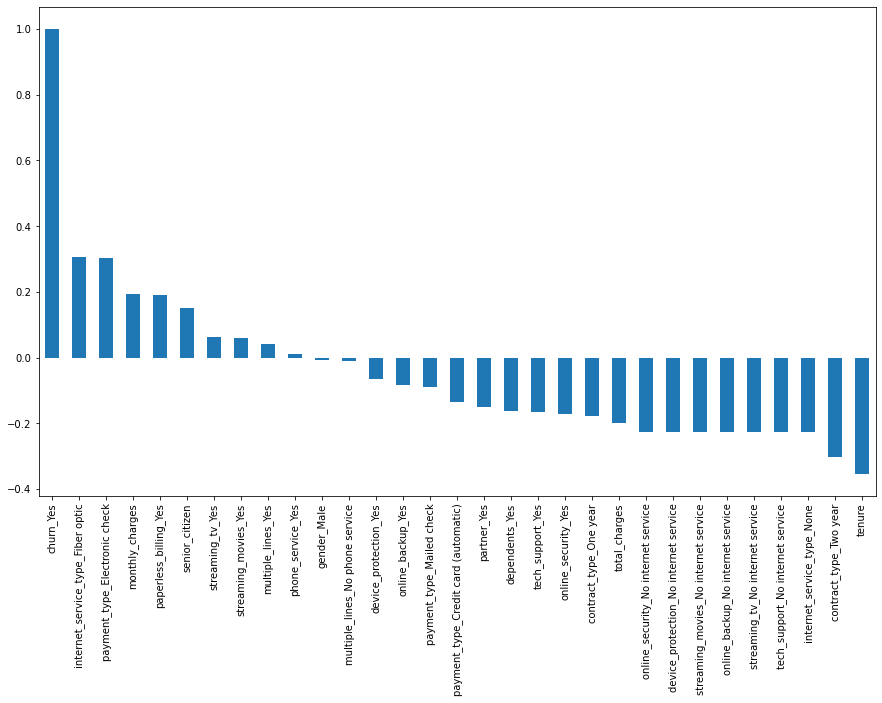

In [14]:
# Removing categorical variables and assigning continuous variables to new df
telco_numvar = telco_df_clean.select_dtypes(include='number')
telco_numvar = telco_numvar.drop(columns= ['internet_service_type_id', 'contract_type_id', 'payment_type_id'])

# Viewing correlations between churn and other variables
telco_correl = telco_numvar.corr()
telco_s = telco_correl.unstack()
churn_corr = telco_s.churn_Yes.sort_values(ascending=False)
plt.figure(figsize=(15,9))
churn_corr.plot.bar()

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 0.04799695, -0.07357446,  0.06463832, -0.11013396,  0.18803224,
        -0.01986755,  0.25712724, -0.21095059,  0.07139953, -0.00621251,
         1.        , -0.00621251,  0.07139953, -0.21095059,  0.25712724,
        -0.01986755,  0.18803224, -0.11013396,  0.06463832, -0.07357446,
         0.04799695]),
 <matplotlib.lines.Line2D at 0x7fdd60e50d90>)

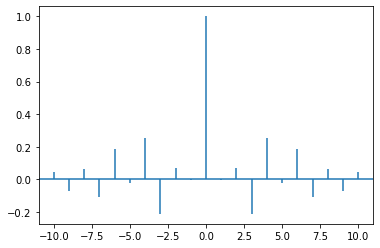

In [15]:
plt.acorr(telco_s.churn_Yes, maxlags=10)

In [16]:
# Identifying variables most highly correlated with churn, threshold set to 0.3
churn_corr[churn_corr.abs() > 0.3]

churn_Yes                            1.000000
internet_service_type_Fiber optic    0.307463
payment_type_Electronic check        0.301455
contract_type_Two year              -0.301552
tenure                              -0.354049
dtype: float64

In [17]:
# sanity checks
print(type(churn_corr))
print(len(churn_corr))
print(len(telco_numvar.columns))

<class 'pandas.core.series.Series'>
31
31


In [10]:
# assigning variables most highly correlated with churn to new df
telco_highcorr = telco_df_clean[['internet_service_type_Fiber optic', 'payment_type_Electronic check', 'churn_Yes', 'contract_type_Two year', 'tenure']]
telco_highcorr.info()
telco_highcorr.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   internet_service_type_Fiber optic  7032 non-null   uint8
 1   payment_type_Electronic check      7032 non-null   uint8
 2   churn_Yes                          7032 non-null   uint8
 3   contract_type_Two year             7032 non-null   uint8
 4   tenure                             7032 non-null   int64
dtypes: int64(1), uint8(4)
memory usage: 137.3 KB


,internet_service_type_Fiber optic,payment_type_Electronic check,churn_Yes,contract_type_Two year,tenure
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.440273,0.336320,0.265785,0.239619,32.421786
std,0.496455,0.472483,0.441782,0.426881,24.545260
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000
75%,1.000000,1.000000,1.000000,0.000000,55.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000


In [11]:
# column renaming
telco_highcorr.rename(columns= {'internet_service_type_Fiber optic': 'fiber', 'payment_type_Electronic check': 'e_check', 'contract_type_Two year': 'two_yr'}, inplace=True)
telco_highcorr.head()

,fiber,e_check,churn_Yes,two_yr,tenure
0,0,0,0,0,9
1,0,0,0,0,9
2,1,1,1,0,4
3,1,1,1,0,13
4,1,0,1,0,3


Correlation strength, fiber vs. tenure: 0.017929529906438438
P-value: 0.132743524781136


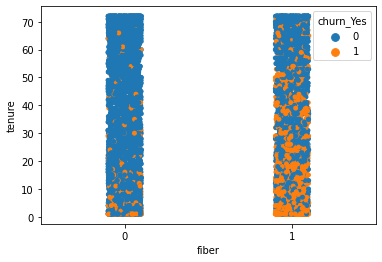

Correlation strength, e-check vs. tenure: -0.2101974961081794
P-value: 4.696364585757513e-71


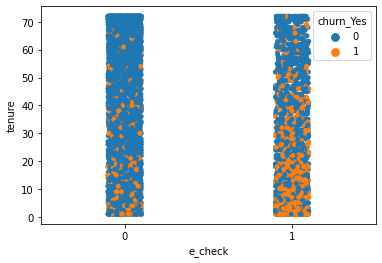

Correlation strength, two-year contract vs. tenure: 0.563800500228651
P-value: 0.0


<AxesSubplot:xlabel='two_yr', ylabel='tenure'>

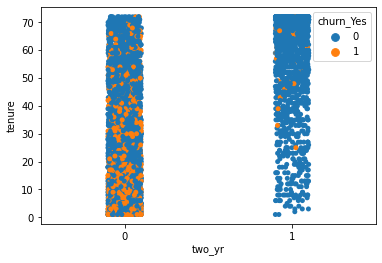

In [45]:
# comparing highcorr variables to tenure (stripplots highlighting churn by hue)
alpha = 0.05
r_coeff, pval = stats.pearsonr(telco_highcorr.fiber, telco_highcorr.tenure)

print(f'Correlation strength, fiber vs. tenure: {r_coeff}\nP-value: {pval}')

sns.stripplot(data=telco_highcorr, x='fiber', y='tenure', hue='churn_Yes')
plt.show()

r_coeff, pval = stats.pearsonr(telco_highcorr.e_check, telco_highcorr.tenure)

print(f'Correlation strength, e-check vs. tenure: {r_coeff}\nP-value: {pval}')

sns.stripplot(data=telco_highcorr, x='e_check', y='tenure', hue='churn_Yes')
plt.show()


r_coeff, pval = stats.pearsonr(telco_highcorr.two_yr, telco_highcorr.tenure)

print(f'Correlation strength, two-year contract vs. tenure: {r_coeff}\nP-value: {pval}')

sns.stripplot(data=telco_highcorr, x='two_yr', y='tenure', hue='churn_Yes')


Correlation between fiber users and tenure doesn't meet the normal minimum confidence value (P-value < alpha(0.05)) and is very low strength (.018), anyway. E-check/tenure correlation (-.210) is also negligible as it is of subpar strength.

Strong negative correlation between customers with two-year contracts and tenure was to be expected.

The highlighting of where the churners were in these groups is probably the most useful information to be gleaned from the visualizations above. ^^^

Avg churn: 26.58%
Avg use of e-checks: 33.63%
---------------
Fiber and Churn:
fiber         0.278266
e_check       0.299721
churn_Yes     0.278266
two_yr        0.272474
tenure       31.079811
dtype: float64
----------
E-Check and Churn:
fiber         0.385020
e_check       0.216802
churn_Yes     0.216802
two_yr        0.302632
tenure       34.566194
dtype: float64
----------
Two-yr contract and Churn:
fiber         0.400672
e_check       0.322328
churn_Yes     0.013430
two_yr        0.013430
tenure       29.127868
dtype: float64


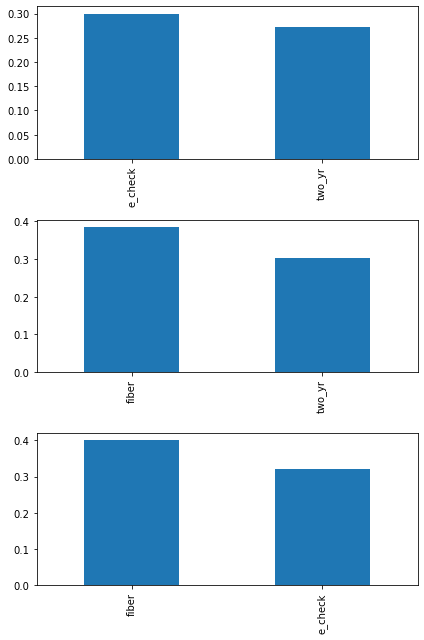

In [13]:
# Outputting avg churn and avg use of e-checks 
print(f'Avg churn: {telco_highcorr.churn_Yes.mean():.2%}\nAvg use of e-checks: {telco_highcorr.e_check.mean():.2%}')
print('---------------')
# Setting the dummies equal to each other for comparison
fiber_eq_churn_avg = telco_highcorr[telco_highcorr.churn_Yes == telco_highcorr.fiber].mean()
check_eq_churn_avg = telco_highcorr[telco_highcorr.churn_Yes == telco_highcorr.e_check].mean()
two_yr_eq_churn_avg = telco_highcorr[telco_highcorr.churn_Yes == telco_highcorr.two_yr].mean()


print(f'Fiber and Churn:\n{fiber_eq_churn_avg}\n----------\nE-Check and Churn:\n{check_eq_churn_avg}\n----------\nTwo-yr contract and Churn:\n{two_yr_eq_churn_avg}')

# quick visualizations -- set cat variables equal, remove and compare remainders
plt.figure(figsize=(6, 9))

plt.subplot(311)
fiber_eq_churn_avg[['e_check','two_yr']].plot.bar()

plt.subplot(312)
check_eq_churn_avg[['fiber','two_yr']].plot.bar()

plt.subplot(313)
two_yr_eq_churn_avg[['fiber', 'e_check']].plot.bar()

plt.tight_layout()

### Exploratory results of looking for drivers of churn by correlation strength:

Largely inconclusive. The variables highest in absolute (+ or -) correlation were not really very strong to begin with. 

In [15]:
telco_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7032 non-null   object 
 1   gender                                 7032 non-null   object 
 2   senior_citizen                         7032 non-null   int64  
 3   partner                                7032 non-null   object 
 4   dependents                             7032 non-null   object 
 5   tenure                                 7032 non-null   int64  
 6   phone_service                          7032 non-null   object 
 7   multiple_lines                         7032 non-null   object 
 8   internet_service_type_id               7032 non-null   int64  
 9   online_security                        7032 non-null   object 
 10  online_backup                          7032 non-null   object 
 11  devi

In [10]:
telco_df_clean.payment_type.value_counts()
telco_df_clean[['payment_type', 'payment_type_id']].sample(25)

,payment_type,payment_type_id
3739,Credit card (automatic),4
5992,Electronic check,1
5829,Bank transfer (automatic),3
3220,Credit card (automatic),4
5382,Bank transfer (automatic),3
5498,Credit card (automatic),4
2659,Mailed check,2
5974,Credit card (automatic),4
5299,Electronic check,1
5127,Bank transfer (automatic),3


### What kind of customer is churning?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7039
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   gender_Male                            1869 non-null   uint8
 1   partner_Yes                            1869 non-null   uint8
 2   dependents_Yes                         1869 non-null   uint8
 3   phone_service_Yes                      1869 non-null   uint8
 4   multiple_lines_No phone service        1869 non-null   uint8
 5   multiple_lines_Yes                     1869 non-null   uint8
 6   online_security_No internet service    1869 non-null   uint8
 7   online_security_Yes                    1869 non-null   uint8
 8   online_backup_No internet service      1869 non-null   uint8
 9   online_backup_Yes                      1869 non-null   uint8
 10  device_protection_No internet service  1869 non-null   uint8
 11  device_protection_Yes         

<AxesSubplot:>

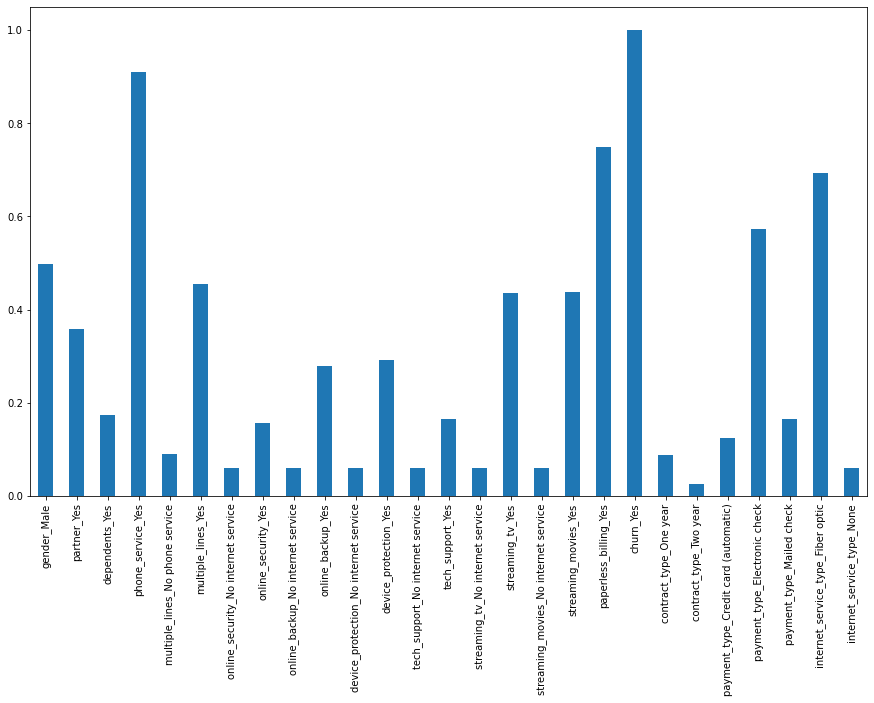

In [21]:
churned_customers = telco_df_clean[telco_df_clean.churn_Yes == 1]

#churned_customers.info()
churn_cust_bin = churned_customers.select_dtypes(include=np.uint8)
churn_cust_bin.info()

plt.figure(figsize=(15,9))
churn_cust_bin.mean().plot.bar()

In [46]:
# Outputting stats of interest regarding phone service
print(f'Avg customers with phone service, absolute: {telco_df_clean.phone_service_Yes.mean():.2%}')
print(f'Avg monthly charges, absolute: {telco_df_clean.monthly_charges.mean():.2f}')
print(f'Avg monthly charges of churners with phone service: {churned_customers[churned_customers.phone_service_Yes == 1].monthly_charges.mean()}')
print(f'Avg monthly charges of churners without phone service: {churned_customers[churned_customers.phone_service_Yes == 0].monthly_charges.mean()}')
print(f'Avg monthly charges of all churners: {churned_customers.monthly_charges.mean()}')

Avg customers with phone service, absolute: 90.33%
Avg monthly charges, absolute: 64.80
Avg monthly charges of churners with phone service: 78.13425544437897
Avg monthly charges of churners without phone service: 37.533823529411755
Avg monthly charges of all churners: 74.44133226324232


Phone service not likely a viable feature for analysis -- Telco $is$ a telecommunications company, after all. Most customers would have phone service.

Fiber internet and paperless billing might be better features for which to select, in terms of analysis.

Overall averages of churners with fiber internet:
senior_citizen                              0.303007
tenure                                     20.196608
internet_service_type_id                    2.000000
contract_type_id                            1.127988
payment_type_id                             1.722436
monthly_charges                            88.126484
total_charges                            1914.616384
gender_Male                                 0.488049
partner_Yes                                 0.387047
dependents_Yes                              0.155744
phone_service_Yes                           1.000000
multiple_lines_No phone service             0.000000
multiple_lines_Yes                          0.591365
online_security_No internet service         0.000000
online_security_Yes                         0.141095
online_backup_No internet service           0.000000
online_backup_Yes                           0.313801
device_protection_No internet service       0.000

Text(0, 0.5, 'Averages')

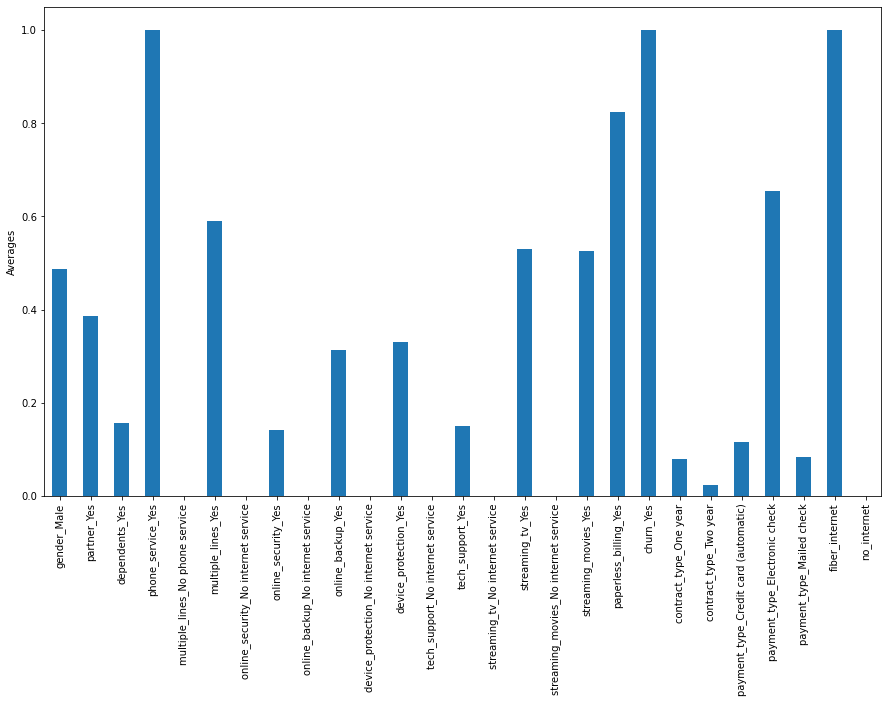

In [30]:
churned_customers.rename(columns= {'internet_service_type_Fiber optic': 'fiber_internet', 'internet_service_type_None': 'no_internet'}, inplace=True)
fiber_churners = churned_customers[churned_customers.fiber_internet == 1]
print(f'Overall averages of churners with fiber internet:\n{fiber_churners.mean()}')
print(f'Number of churners who used fiber internet: {fiber_churners.fiber_internet.sum()}')

#quick viz of categorical variables in fiber_churners df
plt.figure(figsize=(15,9))
fiber_churners.select_dtypes(include=np.uint8).mean().plot.bar()
plt.ylabel('Averages')


Overall averages of churners with paperless billing:
senior_citizen                              0.284286
tenure                                     18.765000
internet_service_type_id                    1.822857
contract_type_id                            1.131429
payment_type_id                             1.753571
monthly_charges                            78.221429
total_charges                            1643.980929
gender_Male                                 0.500714
partner_Yes                                 0.362143
dependents_Yes                              0.155714
phone_service_Yes                           0.915714
multiple_lines_No phone service             0.084286
multiple_lines_Yes                          0.505000
online_security_No internet service         0.030000
online_security_Yes                         0.144286
online_backup_No internet service           0.030000
online_backup_Yes                           0.299286
device_protection_No internet service       0.

Text(0, 0.5, 'Averages')

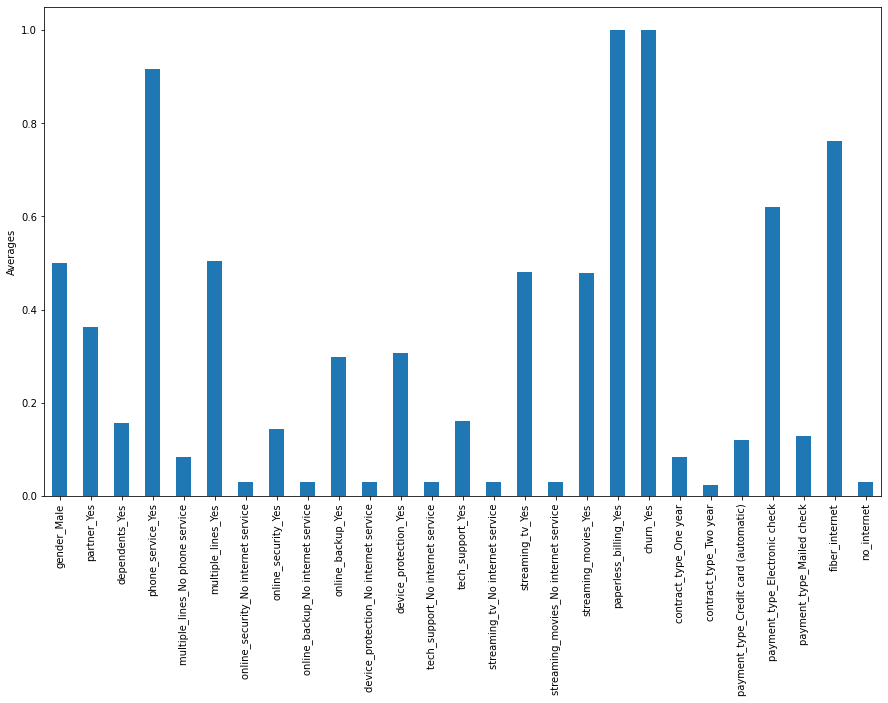

In [31]:
paperless_churners = churned_customers[churned_customers.paperless_billing_Yes == 1]

print(f'Overall averages of churners with paperless billing:\n{paperless_churners.mean()}')
print(f'Number of churners who used paperless billing: {paperless_churners.paperless_billing_Yes.sum()}')

plt.figure(figsize=(15,9))
paperless_churners.select_dtypes(include=np.uint8).mean().plot.bar()
plt.ylabel('Averages')

In [51]:
churned_customers.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'payment_type',
       'internet_service_type', 'gender_Male', 'partner_Yes', 'dependents_Yes',
       'phone_service_Yes', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_

Confidence in our correlation test: 1.000
P-value for this test: 7.130506118252251e-30
Either our confidence value (0.95) was not met, or the correlation coefficient (0.258) fell below what we would consider that of a strong relationship. We cannot reject the null hypothesis.


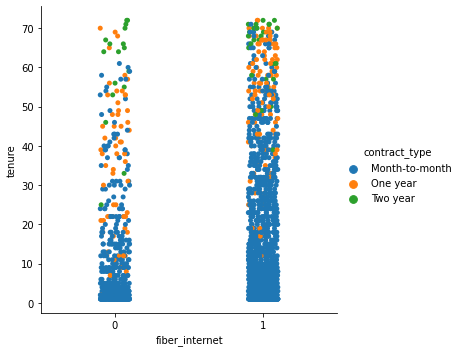

In [50]:
r_coeff, pval = stats.spearmanr(churned_customers.fiber_internet, churned_customers.paperless_billing_Yes)
print(f'Confidence in our correlation test: {1 - pval:.3f}')
print(f'P-value for this test: {pval}')

if pval < alpha and abs(r_coeff) > 0.5:
    print(f'The correlation coefficient for the relationship between churned Telco customers who used fiber internet and those used paperless billing is: {r_coeff:.3f}\n, indicative of a strong relationship between the two groups. We can reject the null hypothesis.')
else:
    print(f'Either our confidence value (0.95) was not met, or the correlation coefficient ({r_coeff:.3f}) fell below what we would consider that of a strong relationship. We cannot reject the null hypothesis.')

sns.catplot(data= churned_customers, x='fiber_internet', y='tenure', hue='contract_type')

### Noted trends in churned customers:
1. Churned customers used paperless billing at rate of almost 75%. Only 12% of these customers used automatic billing.
1. Of customers who churned, nearly 70% had fiber optic internet service. These customers paid more than $23/month more than the average and more than half (52%) streamed TV or movies.
1. Although 76% of the churners who used paperless billing were also users of fiber internet, there was not an especially high correlation coefficient between the two groups.
1. Both groups of customers and their respective potential problems should be further investigated for their potential to reduce churn.

Current hypotheses: 
- Fiber customers who churned were likely either dissatisfied with the service (with special regard to streaming) or found a better price point for the same service with a competitor.
- Paperless billing customers who churned likely had issues with billing that possibly could have been resolved with automatic billing.

### Test models on data, with the above thoughts in mind.

In [52]:
#Imports to make models and evaluate their performance
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix, roc_curve, auc 


In [53]:
# Preparing train, validate and test splits, part 1: separating target variable from the splits

X_train = telco_train.drop(columns= ['churn_Yes'])
y_train = telco_train.churn_Yes

X_validate = telco_validate.drop(columns= ['churn_Yes'])
y_validate = telco_validate.churn_Yes

X_test = telco_test.drop(columns= ['churn_Yes'])
y_test = telco_test.churn_Yes

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5981 to 1671
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            3937 non-null   object 
 1   gender                                 3937 non-null   object 
 2   senior_citizen                         3937 non-null   int64  
 3   partner                                3937 non-null   object 
 4   dependents                             3937 non-null   object 
 5   tenure                                 3937 non-null   int64  
 6   phone_service                          3937 non-null   object 
 7   multiple_lines                         3937 non-null   object 
 8   internet_service_type_id               3937 non-null   int64  
 9   online_security                        3937 non-null   object 
 10  online_backup                          3937 non-null   object 
 11  d

In [54]:
# Part 2: Clearing out object dtypes from the X_ dfs to allow the models to work
X_train = X_train.select_dtypes(include= np.number)
X_validate = X_validate.select_dtypes(include= np.number)
X_test = X_test.select_dtypes(include= np.number)

# Sanity checks
print(X_train.shape, X_validate.shape, X_test.shape)
X_train.info()
X_train.head()

(3937, 33) (1688, 33) (1407, 33)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5981 to 1671
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         3937 non-null   int64  
 1   tenure                                 3937 non-null   int64  
 2   internet_service_type_id               3937 non-null   int64  
 3   contract_type_id                       3937 non-null   int64  
 4   payment_type_id                        3937 non-null   int64  
 5   monthly_charges                        3937 non-null   float64
 6   total_charges                          3937 non-null   float64
 7   gender_Male                            3937 non-null   uint8  
 8   partner_Yes                            3937 non-null   uint8  
 9   dependents_Yes                         3937 non-null   uint8  
 10  phone_service_Yes                   

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
5981,0,42,1,3,4,78.45,3373.40,0,0,0,...,0,1,1,0,1,1,0,0,0,0
4435,0,71,1,3,2,71.10,5224.95,0,1,1,...,0,0,0,0,1,0,0,1,0,0
5154,1,47,2,1,3,85.20,3969.35,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5117,0,67,1,3,4,69.20,4671.65,1,1,0,...,0,1,1,0,1,1,0,0,0,0
6971,0,1,2,1,4,74.30,74.30,0,0,0,...,0,0,1,0,0,1,0,0,1,0


### Make, fit and train models

Decision Trees, precursors for Random Forest

In [55]:
telco_tree1 = DecisionTreeClassifier(max_depth=4, random_state=302)
telco_tree1.fit(X_train, y_train)

telco_tree1_pred = telco_tree1.predict(X_train)
telco_tree1_prob = telco_tree1.predict_proba(X_train)

telco_tree1_prob

array([[0.99118943, 0.00881057],
       [0.99118943, 0.00881057],
       [0.54525386, 0.45474614],
       ...,
       [0.99118943, 0.00881057],
       [0.75483871, 0.24516129],
       [0.78828829, 0.21171171]])

In [17]:
print(f'Accuracy score for Telco tree 1: {telco_tree1.score(X_train, y_train)}')
print(f'Confusion matrix for Telco tree 1:\n{confusion_matrix(y_train, telco_tree1_pred)}')
print(f'Classification report for Telco tree 1:\n{classification_report(y_train, telco_tree1_pred)}')

Accuracy score for Telco tree 1: 0.7962915925831852
Confusion matrix for Telco tree 1:
[[2704  187]
 [ 615  431]]
Classification report for Telco tree 1:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.70      0.41      0.52      1046

    accuracy                           0.80      3937
   macro avg       0.76      0.67      0.69      3937
weighted avg       0.78      0.80      0.78      3937



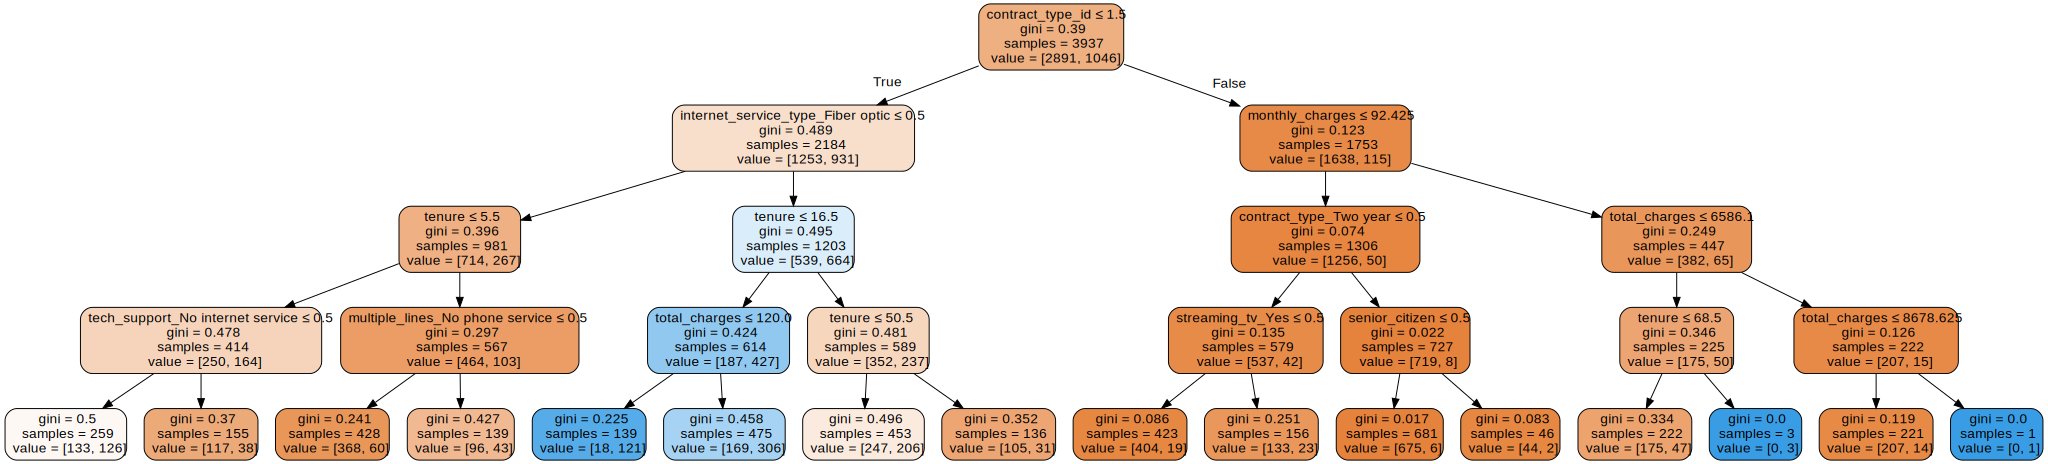

In [56]:
telco_tree1_data = export_graphviz(telco_tree1, out_file=None, feature_names=X_train.columns, filled=True, rounded=True, special_characters=True)
telco_tree1_graph = graphviz.Source(telco_tree1_data)
telco_tree1_graph

In [20]:
#Saving a pdf of telco_tree1's graph to my classification project's directory
telco_tree1_graph.render(outfile='telco_tree1.pdf')

'telco_tree1.pdf'

In [87]:
val_tree1_pred = telco_tree1.predict(X_validate)
val_tree1_prob = telco_tree1.predict_proba(X_validate)

print(f'Accuracy of Telco tree 1 on validate split: {telco_tree1.score(X_validate, y_validate):.3f}')
print(f'Confusion matrix for Telco tree 1 on validate split:\n{confusion_matrix(y_validate, val_tree1_pred)}')
print(f'Classification report for Telco tree 1 on validate split:\n{classification_report(y_validate, val_tree1_pred)}')

val_tree1_prob

Accuracy of Telco tree 1 on validate split: 0.784
Confusion matrix for Telco tree 1 on validate split:
[[1154   85]
 [ 279  170]]
Classification report for Telco tree 1 on validate split:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1239
           1       0.67      0.38      0.48       449

    accuracy                           0.78      1688
   macro avg       0.74      0.66      0.67      1688
weighted avg       0.77      0.78      0.76      1688



array([[0.54525386, 0.45474614],
       [0.93665158, 0.06334842],
       [0.99118943, 0.00881057],
       ...,
       [0.99118943, 0.00881057],
       [0.93665158, 0.06334842],
       [0.99118943, 0.00881057]])

In [57]:
telco_tree2 = DecisionTreeClassifier(max_depth=3, random_state=302)
telco_tree2.fit(X_train, y_train)

telco_tree2_pred = telco_tree2.predict(X_train)
telco_tree2_prob = telco_tree2.predict_proba(X_train)

telco_tree2_prob

array([[0.98899587, 0.01100413],
       [0.98899587, 0.01100413],
       [0.59762309, 0.40237691],
       ...,
       [0.98899587, 0.01100413],
       [0.60386473, 0.39613527],
       [0.77777778, 0.22222222]])

In [88]:
print(f'Accuracy score for Telco tree 2: {telco_tree2.score(X_train, y_train)}')
print(f'Confusion matrix for Telco tree 2:\n{confusion_matrix(y_train, telco_tree2_pred)}')
print(f'Classification report for Telco tree 2:\n{classification_report(y_train, telco_tree2_pred)}')

Accuracy score for Telco tree 2: 0.7952755905511811
Confusion matrix for Telco tree 2:
[[2704  187]
 [ 619  427]]
Classification report for Telco tree 2:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.70      0.41      0.51      1046

    accuracy                           0.80      3937
   macro avg       0.75      0.67      0.69      3937
weighted avg       0.78      0.80      0.78      3937



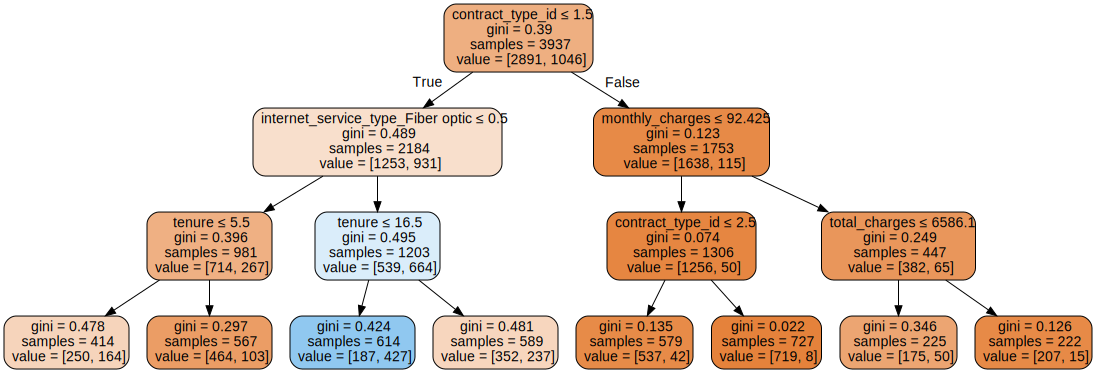

In [71]:
# Viz telco_tree2
telco_tree2_data = export_graphviz(telco_tree2, out_file=None, feature_names=X_train.columns, filled=True, rounded=True, special_characters=True)
telco_tree2_graph = graphviz.Source(telco_tree2_data)
telco_tree2_graph

In [72]:
telco_tree2_graph.render(outfile='telco_tree2.pdf')

'telco_tree2.pdf'

In [68]:
telco_tree3 = DecisionTreeClassifier(max_depth=2, random_state=302)
telco_tree3.fit(X_train, y_train)

telco_tree3_pred = telco_tree3.predict(X_train)
telco_tree3_prob = telco_tree3.predict_proba(X_train)

telco_tree3_prob

array([[0.96171516, 0.03828484],
       [0.96171516, 0.03828484],
       [0.44804655, 0.55195345],
       ...,
       [0.96171516, 0.03828484],
       [0.72782875, 0.27217125],
       [0.85458613, 0.14541387]])

In [69]:
print(f'Accuracy score for Telco tree 3: {telco_tree3.score(X_train, y_train):.3f}')
print(f'Confusion matrix for Telco tree 3:\n{confusion_matrix(y_train, telco_tree3_pred)}')
print(f'Classification report for Telco tree 3:\n{classification_report(y_train, telco_tree3_pred)}')

Accuracy score for Telco tree 3: 0.766
Confusion matrix for Telco tree 3:
[[2352  539]
 [ 382  664]]
Classification report for Telco tree 3:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      2891
           1       0.55      0.63      0.59      1046

    accuracy                           0.77      3937
   macro avg       0.71      0.72      0.71      3937
weighted avg       0.78      0.77      0.77      3937



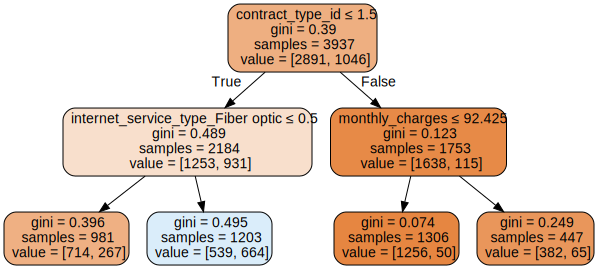

In [73]:
telco_tree3_data = export_graphviz(telco_tree3, out_file=None, feature_names=X_train.columns, filled=True, rounded=True, special_characters=True)
telco_tree3_graph = graphviz.Source(telco_tree3_data)
telco_tree3_graph

In [74]:
telco_tree3_graph.render(outfile='telco_tree3.pdf')

'telco_tree3.pdf'

In [90]:
val_tree3_pred = telco_tree3.predict(X_validate)
val_tree3_prob = telco_tree3.predict_proba(X_validate)

print(f'Accuracy of Telco tree 3 on validate split: {telco_tree3.score(X_validate, y_validate)}')
print(f'Confusion matrix for Telco tree 3 on validate split:\n{confusion_matrix(y_validate, val_tree3_pred)}')
print(f'Classification report for Telco tree 3 on validate split:\n{classification_report(y_validate, val_tree3_pred)}')

val_tree3_prob

Accuracy of Telco tree 3 on validate split: 0.7559241706161137
Confusion matrix for Telco tree 3 on validate split:
[[1007  232]
 [ 180  269]]
Classification report for Telco tree 3 on validate split:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1239
           1       0.54      0.60      0.57       449

    accuracy                           0.76      1688
   macro avg       0.69      0.71      0.70      1688
weighted avg       0.77      0.76      0.76      1688



array([[0.44804655, 0.55195345],
       [0.85458613, 0.14541387],
       [0.96171516, 0.03828484],
       ...,
       [0.96171516, 0.03828484],
       [0.85458613, 0.14541387],
       [0.96171516, 0.03828484]])

In [75]:
X_train.columns

Index(['senior_citizen', 'tenure', 'internet_service_type_id',
       'contract_type_id', 'payment_type_id', 'monthly_charges',
       'total_charges', 'gender_Male', 'partner_Yes', 'dependents_Yes',
       'phone_service_Yes', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'paperless_billing_Yes',
       'contract_type_One year', 'contract_type_Two year',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check', 'internet_service_type_Fiber optic',
       'internet_service_type_None'],
      dtype='object')

In [76]:
# Modifying training split for select feature (fiber internet) to try to boost model scores
X_train_fiber = X_train[['tenure', 'monthly_charges', 'total_charges', 'gender_Male', 'streaming_tv_Yes', 'streaming_movies_Yes', 'internet_service_type_Fiber optic']]

telco_tree4 = DecisionTreeClassifier(max_depth=3, random_state=302)
telco_tree4.fit(X_train_fiber, y_train)

telco_tree4_pred = telco_tree4.predict(X_train_fiber)
telco_tree4_prob = telco_tree4.predict_proba(X_train_fiber)

telco_tree4_prob

array([[0.92169312, 0.07830688],
       [0.98468271, 0.01531729],
       [0.62402496, 0.37597504],
       ...,
       [0.98468271, 0.01531729],
       [0.6183908 , 0.3816092 ],
       [0.85894737, 0.14105263]])

In [78]:
print(f'Accuracy score for Telco tree 4: {telco_tree4.score(X_train_fiber, y_train):.3f}')
print(f'Confusion matrix for Telco tree 4:\n{confusion_matrix(y_train, telco_tree4_pred)}')
print(f'Classification report for Telco tree 4:\n{classification_report(y_train, telco_tree4_pred)}')

Accuracy score for Telco tree 4: 0.794
Confusion matrix for Telco tree 4:
[[2697  194]
 [ 618  428]]
Classification report for Telco tree 4:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2891
           1       0.69      0.41      0.51      1046

    accuracy                           0.79      3937
   macro avg       0.75      0.67      0.69      3937
weighted avg       0.78      0.79      0.77      3937



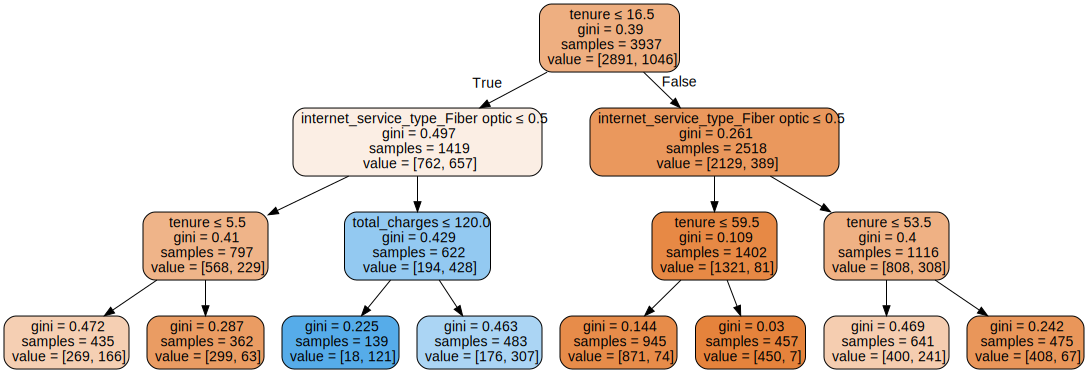

In [79]:
telco_tree4_data = export_graphviz(telco_tree4, out_file=None, feature_names=X_train_fiber.columns, filled=True, rounded=True, special_characters=True)
telco_tree4_graph = graphviz.Source(telco_tree4_data)
telco_tree4_graph

In [80]:
telco_tree4_graph.render(outfile='telco_tree4.pdf')

'telco_tree4.pdf'

In [81]:
#Modifying training for select feature (paperless billing) to try to boost model scores
X_train_paperless = X_train[['tenure', 'monthly_charges', 'total_charges', 'gender_Male', 'paperless_billing_Yes']]
telco_tree5 = DecisionTreeClassifier(max_depth=3, random_state=302)
telco_tree5.fit(X_train_paperless, y_train)

telco_tree5_pred = telco_tree5.predict(X_train_paperless)
telco_tree5_prob = telco_tree5.predict_proba(X_train_paperless)
telco_tree5_prob

array([[0.64797508, 0.35202492],
       [0.8957346 , 0.1042654 ],
       [0.64797508, 0.35202492],
       ...,
       [0.8957346 , 0.1042654 ],
       [0.58309038, 0.41690962],
       [0.87818697, 0.12181303]])

In [82]:
print(f'Accuracy score for Telco tree 5: {telco_tree5.score(X_train_paperless, y_train):.3f}')
print(f'Confusion matrix for Telco tree 5:\n{confusion_matrix(y_train, telco_tree5_pred)}')
print(f'Classification report for Telco tree 5:\n{classification_report(y_train, telco_tree5_pred)}')

Accuracy score for Telco tree 5: 0.790
Confusion matrix for Telco tree 5:
[[2682  209]
 [ 617  429]]
Classification report for Telco tree 5:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2891
           1       0.67      0.41      0.51      1046

    accuracy                           0.79      3937
   macro avg       0.74      0.67      0.69      3937
weighted avg       0.78      0.79      0.77      3937



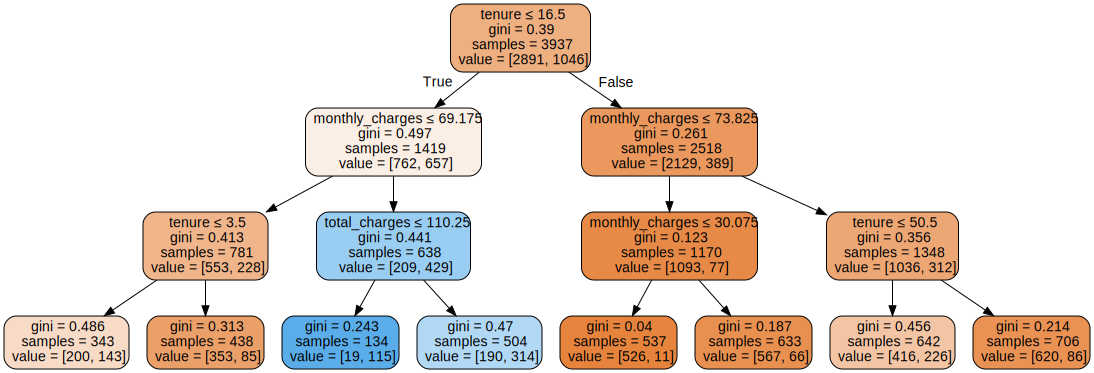

In [89]:
telco_tree5_data = export_graphviz(telco_tree5, out_file=None, feature_names=X_train_paperless.columns, filled=True, rounded=True, special_characters=True)
telco_tree5_graph = graphviz.Source(telco_tree5_data)
telco_tree5_graph

Random Forest Classifiers

In [91]:
telco_rf1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=302)
telco_rf1.fit(X_train, y_train)

rf1_pred = telco_rf1.predict(X_train)
rf1_prob = telco_rf1.predict_proba(X_train)

rf1_prob

array([[0.92304378, 0.07695622],
       [0.96510495, 0.03489505],
       [0.63634117, 0.36365883],
       ...,
       [0.96988754, 0.03011246],
       [0.81867366, 0.18132634],
       [0.89265734, 0.10734266]])

In [92]:
print(f'Accuracy score for Random Forest 1: {telco_rf1.score(X_train, y_train)}')
print(f'Confusion matrix for Random Forest 1:\n{confusion_matrix(y_train, rf1_pred)}')
print(f'Classification report for Random Forest 1:\n{classification_report(y_train, rf1_pred)}')

Accuracy score for Random Forest 1: 0.8036576073152146
Confusion matrix for Random Forest 1:
[[2701  190]
 [ 583  463]]
Classification report for Random Forest 1:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2891
           1       0.71      0.44      0.55      1046

    accuracy                           0.80      3937
   macro avg       0.77      0.69      0.71      3937
weighted avg       0.79      0.80      0.79      3937



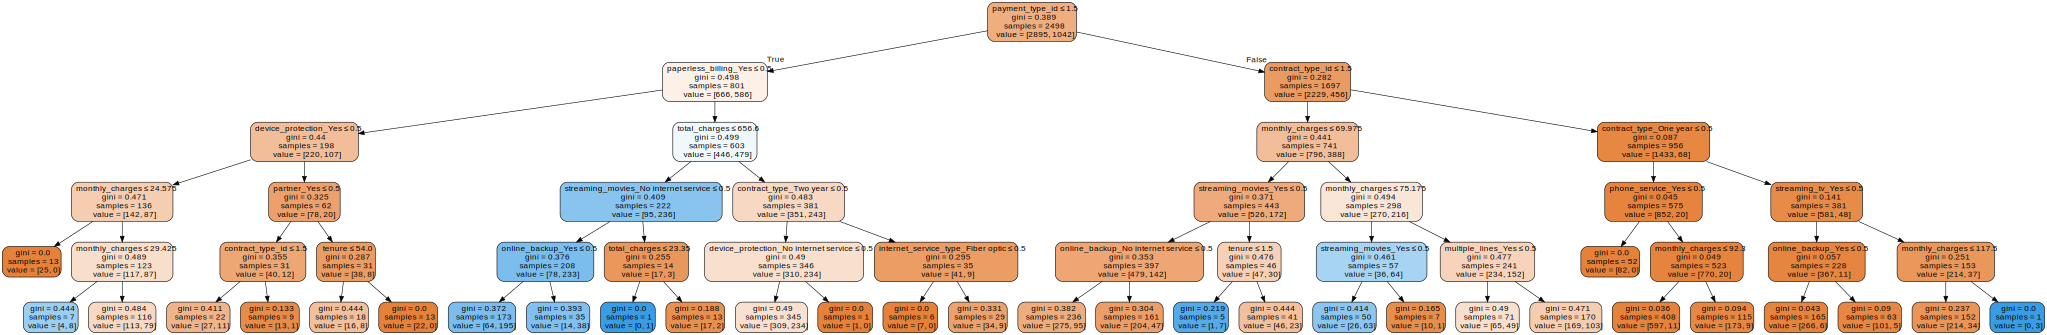

In [93]:
rf1_estimator = telco_rf1.estimators_[28] # Random tree can be selected by changing index on estimator
rf1_data = export_graphviz(rf1_estimator, out_file=None, feature_names=X_train.columns, filled=True, rounded=True, special_characters=True)
rf1_graph = graphviz.Source(rf1_data)
rf1_graph


In [100]:
telco_rf2 = RandomForestClassifier(n_estimators=1000, max_depth=4, random_state=302)
telco_rf2.fit(X_train, y_train)

rf2_pred = telco_rf2.predict(X_train)
rf2_prob = telco_rf2.predict_proba(X_train)

rf2_prob

array([[0.93216992, 0.06783008],
       [0.95637826, 0.04362174],
       [0.64984209, 0.35015791],
       ...,
       [0.9546096 , 0.0453904 ],
       [0.78939923, 0.21060077],
       [0.88906262, 0.11093738]])

In [101]:
print(f'Accuracy score for Random Forest 2: {telco_rf2.score(X_train, y_train)}')
print(f'Confusion matrix for Random Forest 2:\n{confusion_matrix(y_train, rf2_pred)}')
print(f'Classification report for Random Forest 2:\n{classification_report(y_train, rf2_pred)}')

Accuracy score for Random Forest 2: 0.7967995935991872
Confusion matrix for Random Forest 2:
[[2732  159]
 [ 641  405]]
Classification report for Random Forest 2:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      2891
           1       0.72      0.39      0.50      1046

    accuracy                           0.80      3937
   macro avg       0.76      0.67      0.69      3937
weighted avg       0.79      0.80      0.77      3937



In [102]:
telco_rf3 = RandomForestClassifier(n_estimators=500, max_depth=3, random_state=302)
telco_rf3.fit(X_train, y_train)

rf3_pred = telco_rf3.predict(X_train)
rf3_prob = telco_rf3.predict_proba(X_train)

rf3_prob

array([[0.90313172, 0.09686828],
       [0.92847697, 0.07152303],
       [0.67409884, 0.32590116],
       ...,
       [0.92692061, 0.07307939],
       [0.7512498 , 0.2487502 ],
       [0.86808902, 0.13191098]])

In [103]:
print(f'Accuracy score for Random Forest 3: {telco_rf3.score(X_train, y_train)}')
print(f'Confusion matrix for Random Forest 3:\n{confusion_matrix(y_train, rf3_pred)}')
print(f'Classification report for Random Forest 3:\n{classification_report(y_train, rf3_pred)}')

Accuracy score for Random Forest 3: 0.7907035814071628
Confusion matrix for Random Forest 3:
[[2758  133]
 [ 691  355]]
Classification report for Random Forest 3:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      2891
           1       0.73      0.34      0.46      1046

    accuracy                           0.79      3937
   macro avg       0.76      0.65      0.67      3937
weighted avg       0.78      0.79      0.76      3937

